<div style="font-size:32px"><b>Introduction</b></div>
<hr style="height:6px;background-color:#6c9596;border-radius:4px">

<div style="line-height:40px;font-size=28px">
    <p style="line-height:30px">Dengue is a virus that is transmitted by female Aedes Egypt Mosquito, mostly presented in tropical and subtropical areas of the world. It is most common in the most rainy months, in reason of the reproduction of the mosquito in stationary water.</p>
    <p style="line-height:30px">This extracted data is from Brazil, grouped by the UF (state), Year and Month, which join with the rain data of the time.</p>
</div>

<div style="font-size:32px"><b>Imports</b></div>
<hr style="height:6px;background-color:#6c9596;border-radius:4px">

In [9]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

<div style="font-size:32px"><b>Understading the Data</b></div>
<hr style="height:6px;background-color:#6c9596;border-radius:4px">

In [2]:
data = pd.read_csv("./output_data/result-00000-of-00001.csv", delimiter=";")
data.head()

,uf,year,month,rain,dengue
0,SP,2015,1,4465.0,772.0
1,SP,2015,2,6595.0,3086.0
2,SP,2015,3,6210.6,8824.0
3,SP,2015,4,1862.0,9932.0
4,SP,2015,5,2756.6,8919.0


In [3]:
data.shape

(420, 5)

In [4]:
data.corr()

,year,month,rain,dengue
year,1.000000e+00,7.920083e-15,0.080571,-0.104368
month,7.920083e-15,1.000000e+00,-0.000032,-0.308431
rain,8.057089e-02,-3.195463e-05,1.000000,-0.068921
dengue,-1.043682e-01,-3.084315e-01,-0.068921,1.000000


<div style="font-size:32px"><b>Data by Time</b></div>
<hr style="height:6px;background-color:#6c9596;border-radius:4px">

In [6]:
grouped_month = data.groupby('month').mean().reset_index()

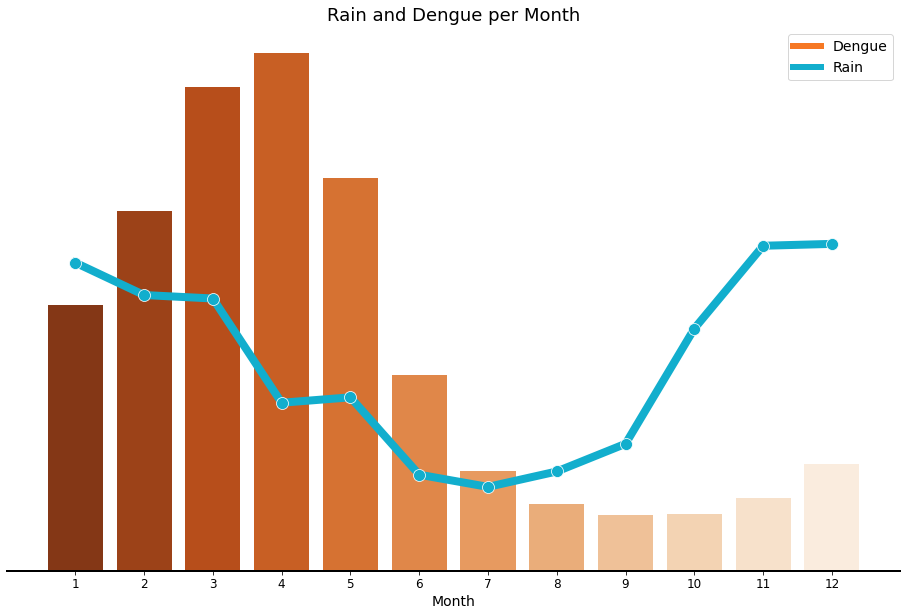

In [96]:
# Dengue
ax = sns.barplot(data=grouped_month, x='month', y = 'dengue', palette = 'Oranges_r')

# Rain
sns.lineplot(x=np.arange(0, 12, 1), y = grouped_month['rain'], linewidth=8, color="#12aecd", marker="o", markersize=12)

# Visualization
ax.figure.set_size_inches(16, 10)
ax.set_ylabel("")
ax.set_xlabel("Month", fontsize=14)
ax.set_title("Rain and Dengue per Month", fontsize=18)

plt.xticks(fontsize=12)
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set(linewidth = 2)

# Legend
custom_colors = [Line2D([0], [0], color=sns.color_palette('Oranges_r')[2], lw=6),
                 Line2D([0], [0], color="#12aecd", lw=6)]
plt.legend(custom_colors, ["Dengue", "Rain"], fontsize=14)

plt.show()

<div style="line-height:40px;font-size=28px">
    <p style="line-height:30px">As expected, the months with the less rain - June, July and August (winter in Brazil) until October are the months with less dengue occurence.</p>
</div>

In [43]:
grouped_year = data.groupby('year').mean().reset_index()
grouped_year

,year,month,rain,dengue
0,2015,6.5,2822.128571,3989.202381
1,2016,6.5,2865.280952,6193.357143
2,2017,6.5,3189.007143,1509.654762
3,2018,6.5,3502.028571,877.202381
4,2019,6.5,3378.078571,4306.547619


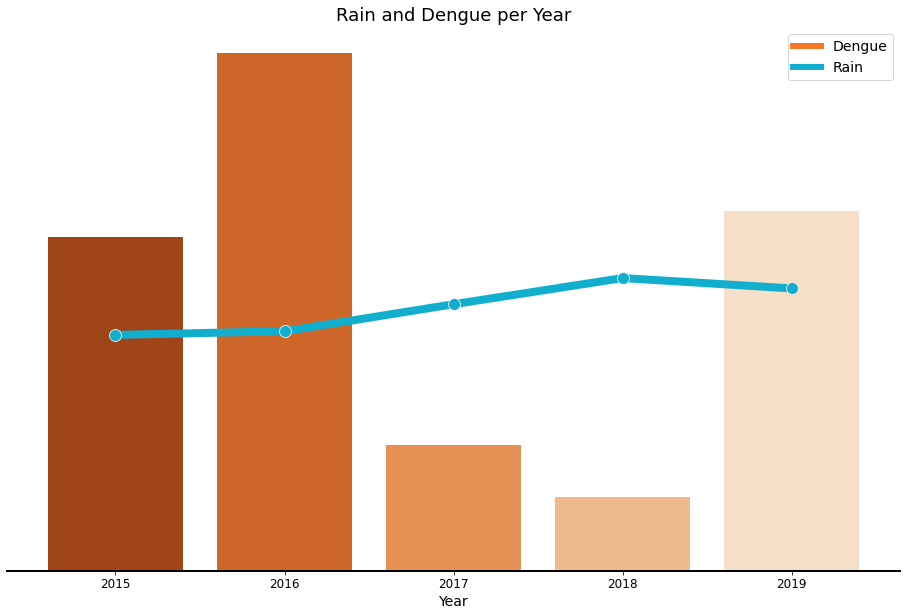

In [64]:
# Dengue
ax = sns.barplot(data=grouped_year, x='year', y = 'dengue', palette = 'Oranges_r')

# Rain
sns.lineplot(x=np.arange(0, 5, 1), y = grouped_year['rain'], linewidth=8, color="#12aecd", marker="o", markersize=12)

# Visualization
ax.figure.set_size_inches(16, 10)
ax.set_ylabel("")
ax.set_xlabel("Year", fontsize=14)
ax.set_title("Rain and Dengue per Year", fontsize=18)

plt.xticks(fontsize=12)
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set(linewidth = 2)

# Legend
custom_colors = [Line2D([0], [0], color=sns.color_palette('Oranges_r')[2], lw=6),
                 Line2D([0], [0], color="#12aecd", lw=6)]
plt.legend(custom_colors, ["Dengue", "Rain"], fontsize=14)

plt.show()

<div style="line-height:40px;font-size=28px">
    <p style="line-height:30px">The rain data remained constant through years, while the dengue occurence dropped a lot in 2017 and 2018, in reason of great campaign from the government against the reproduction of the mosquito, owing to huge occurence in past years. In 2019, the virus went up again because of mutations that made the reproduction easier, besides the relaxation of the government and people.</p>
</div>

<div style="font-size:32px">Analyzing UFs</div>
<hr style="height:6px;background-color:#6c9596;border-radius:4px">

In [23]:
grouped_uf = data.groupby("uf").mean().reset_index()
grouped_uf

,uf,year,month,rain,dengue
0,CE,2017.0,6.5,737.556667,3919.266667
1,ES,2017.0,6.5,946.993333,3489.400000
2,MG,2017.0,6.5,5527.416667,2199.500000
3,PR,2017.0,6.5,2928.593333,7791.850000
4,RJ,2017.0,6.5,2368.823333,3576.333333
5,RS,2017.0,6.5,5605.466667,39.550000
6,SP,2017.0,6.5,3944.283333,2610.450000


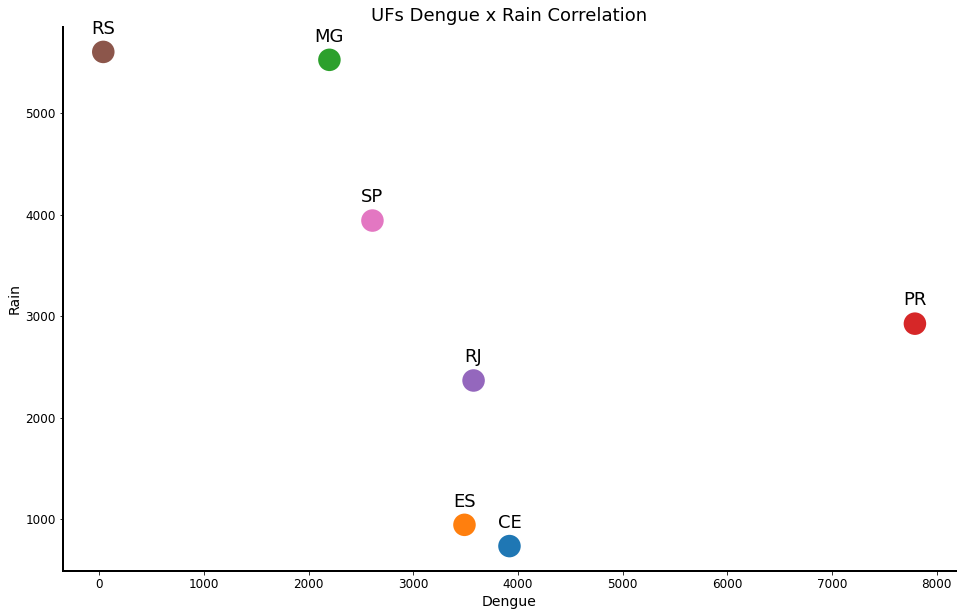

In [42]:
ax = sns.scatterplot(data = grouped_uf, x = "dengue", y = "rain", hue = "uf", s= 600)
ax.figure.set_size_inches(16, 10)

# Visualization
ax.set_ylabel("Rain", fontsize=14)
ax.set_xlabel("Dengue", fontsize=14)
ax.set_title("UFs Dengue x Rain Correlation", fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

# Text for UFs
for index, row in grouped_uf.iterrows():
    plt.text(s = row['uf'], x = row['dengue'], y = row['rain'] + 180,
            ha = 'center', fontsize=18)

plt.legend().remove()
plt.show()

<div style="line-height:40px;font-size=28px">
    <p style="line-height:30px">RS (Rio Grande do Sul) despite being the most rainy UF, had an almost null occurence of dengue in the interval of time. SP (São Paulo) and MG (Minas Gerais) had a balance between rain and dengue.</p>
    <p style="line-height:30px">In other hand, ES (Espírito Santo) and CE (Ceará) had a small rain data compared to the others in the period, while surpasses RS, MG and SP in dengue occurence.</p>
    <p style="line-height:30px">PR (Paraná) had the most dengue occurence at same time that didn't was very rainy, it is an anomaly.</p>
</div>

<div style="font-size:32px">Dates with most Dengue Occurence</div>
<hr style="height:6px;background-color:#6c9596;border-radius:4px">

In [87]:
most_dengue = data.sort_values('dengue', ascending=False).head(8).reset_index()
most_dengue

,index,uf,year,month,rain,dengue
0,94,PR,2016,2,4652.6,56305.0
1,95,PR,2016,3,2390.4,48403.0
2,96,PR,2016,4,1584.8,40074.0
3,93,PR,2016,1,3801.2,39460.0
4,51,PR,2015,4,1249.4,25386.0
5,350,SP,2019,3,6784.0,25134.0
6,400,PR,2019,5,4169.6,24737.0
7,123,MG,2016,2,5036.4,23590.0


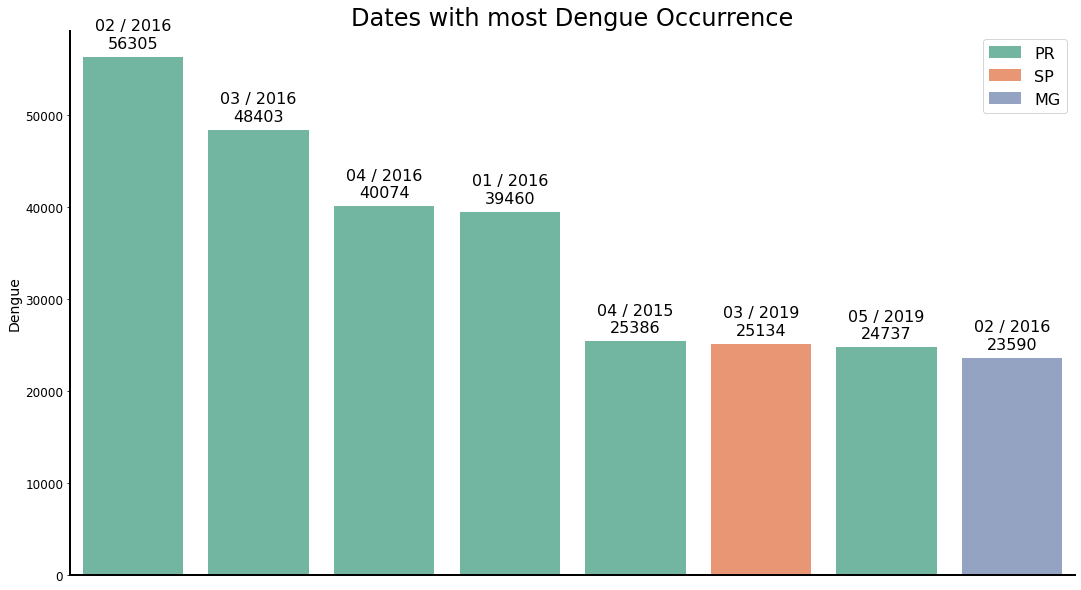

In [95]:
ax = sns.barplot(data = most_dengue, y = 'dengue', x = np.arange(0, 8, 1), 
                 hue = 'uf', dodge = False, palette="Set2")

# Visualization
ax.figure.set_size_inches(18, 10)
ax.set_ylabel("Dengue", fontsize=14)
ax.set_xlabel("")
ax.set_title("Dates with most Dengue Occurrence", fontsize=24)

plt.xticks([])
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

plt.legend(fontsize=16)


# Texts
for index, row in most_dengue.iterrows():
    text = "0" + str(row['month']) + " / " + \
            str(row['year']) + "\n" + str(int(row['dengue']))
    
    y = row['dengue'] + 1000
    plt.text(s=text, x = index, y = y, fontsize=16, ha='center')


plt.show()

<div style="line-height:40px;font-size=28px">
    <p style="line-height:30px">6 of the 8 months with the most dengue occurrence are from PR, which explains the anomaly in the data. The first third of the year 2016 for PR was the greatest concentration of dengue occurence.</p>
</div>